# Neural Networks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, models

from scikeras.wrappers import KerasClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [51]:
path = r"C:\Users\stlp\Downloads\Assignment 9 dataset-Faults.nna"

with open(path, encoding='utf-8') as file:
    content = file.readlines()

# Print the first few lines to inspect the content
for line in content[:10]:
    print(line.strip())

42	50	270900	270944	267	17	44	24220	76	108	1687	1	0	80	0.0498	0.2415	0.1818	0.0047	0.4706	1	1	2.4265	0.9031	1.6435	0.8182	-0.2913	0.5822	1	0	0	0	0	0	0
645	651	2538079	2538108	108	10	30	11397	84	123	1687	1	0	80	0.7647	0.3793	0.2069	0.0036	0.6	0.9667	1	2.0334	0.7782	1.4624	0.7931	-0.1756	0.2984	1	0	0	0	0	0	0
829	835	1553913	1553931	71	8	19	7972	99	125	1623	1	0	100	0.971	0.3426	0.3333	0.0037	0.75	0.9474	1	1.8513	0.7782	1.2553	0.6667	-0.1228	0.215	1	0	0	0	0	0	0
853	860	369370	369415	176	13	45	18996	99	126	1353	0	1	290	0.7287	0.4413	0.1556	0.0052	0.5385	1	1	2.2455	0.8451	1.6532	0.8444	-0.1568	0.5212	1	0	0	0	0	0	0
1289	1306	498078	498335	2409	60	260	246930	37	126	1353	0	1	185	0.0695	0.4486	0.0662	0.0126	0.2833	0.9885	1	3.3818	1.2305	2.4099	0.9338	-0.1992	1	1	0	0	0	0	0	0
430	441	100250	100337	630	20	87	62357	64	127	1387	0	1	40	0.62	0.3417	0.1264	0.0079	0.55	1	1	2.7993	1.0414	1.9395	0.8736	-0.2267	0.9874	1	0	0	0	0	0	0
413	446	138468	138883	9052	230	432	1481991	23	199	1687	0	1	150	0.4896	0.339	

In [53]:
columns = [
    'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
    'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity', 'Minimum_of_Luminosity',
    'Maximum_of_Luminosity', 'Length_of_Conveyer', 'TypeOfSteel_A300',
    'TypeOfSteel_A400', 'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index',
    'Square_Index', 'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index',
    'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index',
    'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas',
    'Pastry', 'Z_Scratch', 'K_Scratch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'
]

data = [line.strip().split('\t') for line in content]
df = pd.DataFrame(data, columns=columns)

df = df.apply(pd.to_numeric)

df.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scratch,Stains,Dirtiness,Bumps,Other_Faults
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,...,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,...,0.083288,-0.131305,0.585420,0.081401,0.097888,0.201443,0.037094,0.028336,0.207110,0.346728
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,...,0.500868,0.148767,0.339452,0.273521,0.297239,0.401181,0.189042,0.165973,0.405339,0.476051
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,...,-0.991000,-0.998900,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,...,-0.333300,-0.195000,0.248200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,...,0.095200,-0.133000,0.506300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,...,0.511600,-0.066600,0.999800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,...,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Part 1: 

Use a neural network and see how well you could predict the type of faults in steel plates from numeric attributes only.

In [56]:
x = df.drop(columns = ['TypeOfSteel_A300', 'TypeOfSteel_A400', 'Pastry', 'Z_Scratch', 'K_Scratch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'])
y = df[['Pastry', 'Z_Scratch', 'K_Scratch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']]

In [70]:
# show how nodes in hidden layers affect performance 
# return dataframe of node combinations and accuracies
def node_exploration(layer1, layer2, X, Y):
    # save values to initialize and return a dataframe
    hidden_layer_1 = []
    hidden_layer_2 = []
    model_accuracy = []
    
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(X)

    x_train, x_test, y_train, y_test = train_test_split(x_scaled, Y, test_size = 0.3, random_state = 12)
    
    for node1 in layer1:
        for node2 in layer2: 
            if node2 <= node1:
                
                hidden_layer_1.append(node1)
                hidden_layer_2.append(node2)
                
                model = keras.Sequential([
                    layers.Input(shape = (x_train.shape[1],)),  
                    layers.Dense(node1, activation = 'relu'),      
                    layers.Dense(node2, activation = 'relu'),    
                    layers.Dense(y_train.shape[1], activation = 'sigmoid')  
                ])
                
                model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
                
                model.fit(x_train, y_train, epochs = 50, batch_size = 32, validation_split = 0.3, verbose = 0)
                
                loss, accuracy = model.evaluate(x_test, y_test, verbose = 0)
                model_accuracy.append(accuracy)
                print('Nodes in first hidden layer:', node1)
                print('Nodes in second hidden layer:', node2)
                print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")
                print()

    data = {
        'Layer 1': hidden_layer_1,
        'Layer 2': hidden_layer_2,
        'Accuracy': model_accuracy
    }
    results_df = pd.DataFrame(data)
    return results_df

To determine the maximum number of nodes in the layers, I used the method found [here](https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw).

$
N_h = \frac{N_s}{\alpha \times (N_i + N_o)}
$

- $N_i$: Number of input neurons.
- $N_o$: Number of output neurons.
- $N_s$: Number of samples in the training dataset.
- $\alpha$: An arbitrary scaling factor, usually between 2 and 10.

So, maximum amount of neurons should be roughly less than 97 through 485. I set a maximum of 128. 

In [72]:
layer1 = [16, 24, 32, 48, 64, 96, 128]
layer2 = layer1
nodes_df = node_exploration(layer1, layer2, x, y)

Nodes in first hidden layer: 16
Nodes in second hidden layer: 16
Test Loss: 0.2052, Test Accuracy: 0.6861

Nodes in first hidden layer: 24
Nodes in second hidden layer: 16
Test Loss: 0.1958, Test Accuracy: 0.6930

Nodes in first hidden layer: 24
Nodes in second hidden layer: 24
Test Loss: 0.2140, Test Accuracy: 0.6964

Nodes in first hidden layer: 32
Nodes in second hidden layer: 16
Test Loss: 0.1918, Test Accuracy: 0.7238

Nodes in first hidden layer: 32
Nodes in second hidden layer: 24
Test Loss: 0.1977, Test Accuracy: 0.7204

Nodes in first hidden layer: 32
Nodes in second hidden layer: 32
Test Loss: 0.1933, Test Accuracy: 0.7427

Nodes in first hidden layer: 48
Nodes in second hidden layer: 16
Test Loss: 0.2016, Test Accuracy: 0.7118

Nodes in first hidden layer: 48
Nodes in second hidden layer: 24
Test Loss: 0.1898, Test Accuracy: 0.7187

Nodes in first hidden layer: 48
Nodes in second hidden layer: 32
Test Loss: 0.2008, Test Accuracy: 0.7341

Nodes in first hidden layer: 48
Nodes

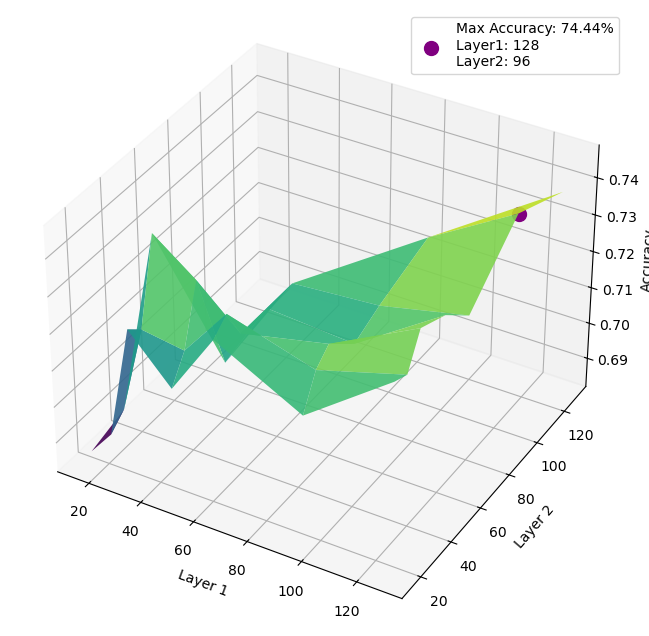

In [124]:
# plot accuracies
X = nodes_df[['Layer 1', 'Layer 2']].values
Y = nodes_df['Accuracy'].values

x = np.unique(nodes_df['Layer 1'])
y = np.unique(nodes_df['Layer 2'])
X_grid, Y_grid = np.meshgrid(x, y)
Z_grid = np.empty(X_grid.shape)

for i in range(len(x)):
    for j in range(len(y)):
        mask = (nodes_df['Layer 1'] == x[i]) & (nodes_df['Layer 2'] == y[j])
        if mask.any():
            Z_grid[j, i] = nodes_df[mask]['Accuracy'].values[0]
        else:
            Z_grid[j, i] = np.nan

# max value and location
max_idx = np.argmax(Y)
max_value = Y[max_idx]
max_layer_1 = X[max_idx][0]
max_layer_2 = X[max_idx][1]

fig = plt.figure(figsize=(10, 8)) 
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev = 35)

ax.plot_surface(X_grid, Y_grid, Z_grid, cmap = 'viridis', alpha = 0.9)
ax.scatter(max_layer_1, max_layer_2, max_value, color = 'purple', s = 100, label = 'Max Accuracy: 74.44%\nLayer1: 128\nLayer2: 96')
ax.legend()


ax.set_xlabel('Layer 1')
ax.set_ylabel('Layer 2')
ax.set_zlabel('Accuracy')

plt.savefig('NN_Accuracies.png')
plt.show()